# This is a notebook to show a short example on how the DTW python algorithm can be used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dtw
from datetime import datetime
%matplotlib widget

##### First, we generate two sample frames. I use the example of a simple 2D gaussian that doesn't change intensity in time but only moves position.

In [2]:
# this function is just to create 2D eliptic gaussians
def blob_maker(A, x, y, x0, y0, sigma_x, sigma_y):
    z = np.zeros([len(y), len(x)])
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            z[j,i] = A * np.exp(-((((x[i] - x0)**2) / \
                    (2.0 * sigma_x**2)) + (((y[j] - y0)**2) / \
                                           (2.0*sigma_y**2))))
    return z

In [3]:
# setting initial parameters for the gaussians
A = 32.
x0 = 55.
y0 = 41.
sigma_x = 12.
sigma_y = 7.
x = np.linspace(1, 128, 128)
y = np.linspace(1, 64, 64)
# gaussian 1
z1 = blob_maker(A, x, y, x0, y0, sigma_x, sigma_y)
# gaussian 2
z2 = blob_maker(A, x, y, x0 + 11., y0 - 5., sigma_x, sigma_y)
xx, yy = np.meshgrid(x, y)

Text(0.5, 1.0, 'frame 2, displaced (11, -5), centre at (66, 36)')

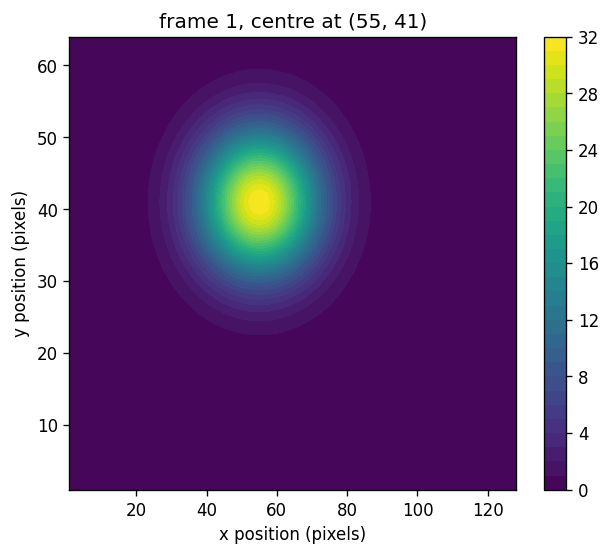

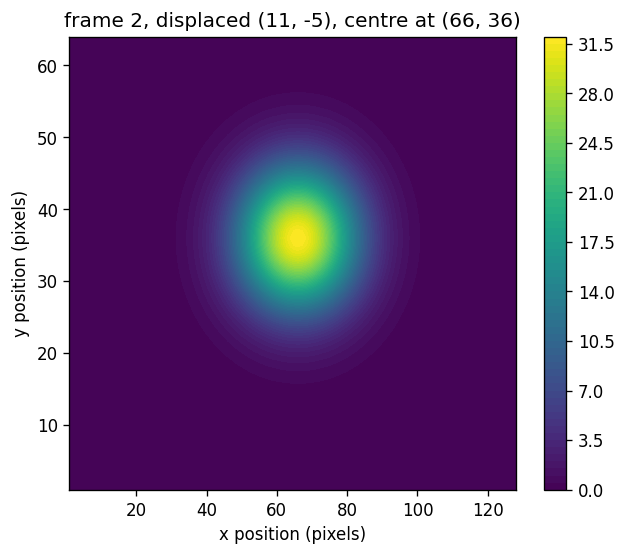

In [4]:
# plot the figures
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z1, 32, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('frame 1, centre at (55, 41)')
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z2, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('frame 2, displaced (11, -5), centre at (66, 36)')

We now run the images through the algorithm

Time taken for this test was 0:00:00.467669
The actual displacement should have been vx = 11, vy = -5
The calculated displacements: vx = 10.75, vy = -6.34
Calculated average displacement: vx = 9.86+/-2.31, vy = -4.14+/-0.93


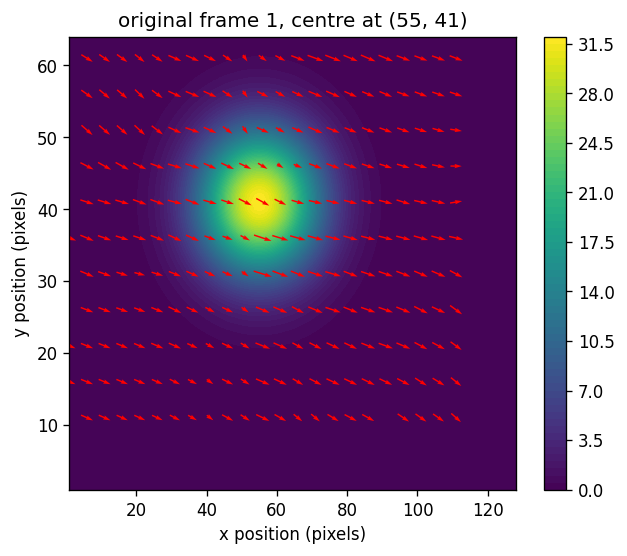

In [5]:
t1 = datetime.now()
# note here there are no specific R / z coordinates like in the 
# real data, so only xx and yy, which are essentially the 2D
# pixels arrays are entered
vel_x, vel_y = dtw.DTW(z1, z2, xx, yy)
t2 = datetime.now()
print('Time taken for this test was {}'.format(t2 - t1))

plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('original frame 1, centre at (55, 41)')
plt.quiver(xx[::5, ::5], yy[::5, ::5], vel_x[::5, ::5], \
           vel_y[::5, ::5], color = 'r', pivot = 'mid')

print('The actual displacement should have been vx = 11, vy = -5')
print('The calculated displacements: vx = {:.2f}, vy = {:.2f}'\
                          .format(vel_x[40,54], vel_y[40,54]))
boo = z1 >= (z1.max() / 2.)
print('Calculated average displacement: vx = {:.2f}+/-{:.2f}, vy = {:.2f}+/-{:.2f}'
     .format(np.mean(vel_x[boo]), np.std(vel_x[boo]), np.mean(vel_y[boo]), np.std(vel_y[boo])))

As can be seen, the algorithm distorts image 2 into image 1, and then returns the distorted coordinates. By comparing the distorted coordinates with the original ones, the displacement required to distort image 1 to image 2 is calculated, at the positions in image 1.

Here, I also do the same test above but using positions from ASDEX shot # 34676 to show that it still works as planned.

In [6]:
R = np.load('Rz.npz')['R']
z = np.load('Rz.npz')['z']

Text(0.5, 1.0, 'frame 2, centre at (2.10, -0.14)')

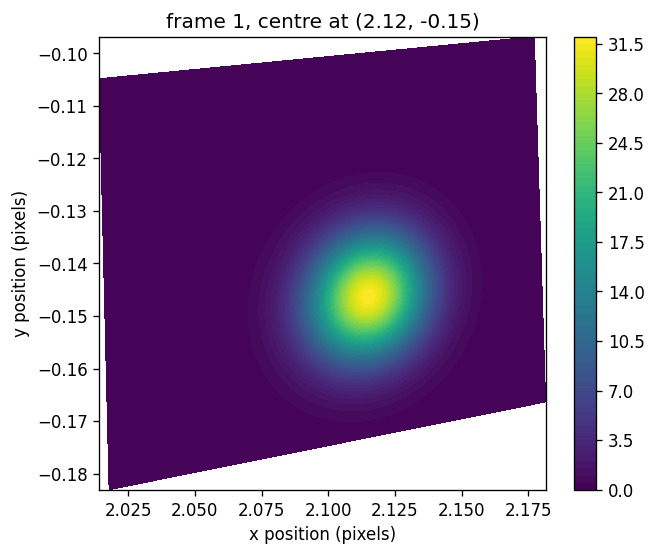

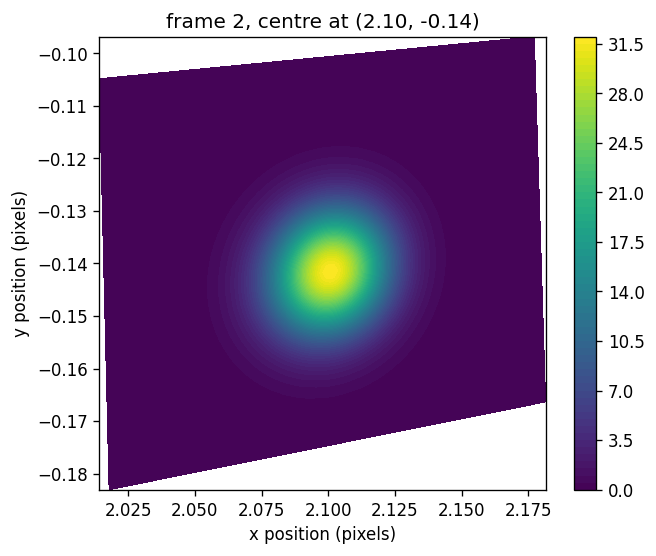

In [7]:
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(R, z, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('frame 1, centre at ({:.2f}, {:.2f})'.\
                      format(R[40,54], z[40,54]))
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(R, z, z2, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('frame 2, centre at ({:.2f}, {:.2f})'.\
                      format(R[35,65], z[35,65]))

In [8]:
t1 = datetime.now()
vel_x, vel_y = dtw.DTW(z1, z2, xx, yy)
t2 = datetime.now()
print('Time taken for this test was {}'.format(t2 - t1))

Time taken for this test was 0:00:00.531880


The actual displacement should have been vx = 11, vy = -5
The calculated displacements: vx = 10.75, vy = -6.34
Calculated average displacement: vx = 9.86+/-2.31, vy = -4.14+/-0.93


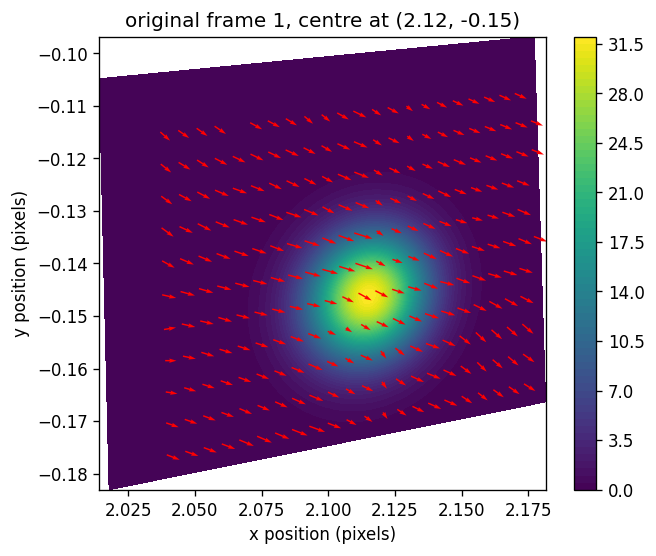

In [9]:
# There is no difference in time taken between
# different coordinates used
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(R, z, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('original frame 1, centre at ({:.2f}, {:.2f})'.\
                      format(R[40,54], z[40,54]))
plt.quiver(R[::5, ::5], z[::5, ::5], vel_x[::5, ::5], \
           vel_y[::5, ::5], color = 'r', pivot = 'mid')

print('The actual displacement should have been vx = 11, vy = -5')
print('The calculated displacements: vx = {:.2f}, vy = {:.2f}'\
                          .format(vel_x[40,54], vel_y[40,54]))
boo = z1 >= (z1.max() / 2.)
print('Calculated average displacement: vx = {:.2f}+/-{:.2f}, vy = {:.2f}+/-{:.2f}'
     .format(np.mean(vel_x[boo]), np.std(vel_x[boo]), np.mean(vel_y[boo]), np.std(vel_y[boo])))

In the case of the simple gaussian, the above can be even further improved by normalising the strips using the strip bool. Testing is required to see if this is the case for all image types, and similar testing is required for the frame bool.
<br>
<br>
For extra assistance, the doc-string for all_iterations can be printed.

In [10]:
help(dtw.DTW)

Help on function DTW in module DTW:

DTW(z1, z2, oxx, oyy, strip_width_list=[32, 22, 16, 12, 8, 6, 4], m_list=[11, 8, 6, 4, 3, 2, 2], frame_bool=False, strip_bool=True, global_distance_new_bool=True, path_finder_new_bool=True, x_first=True, local_distance_new_bool=True, alpha='cosine', fast=True, l=3.0)
    DTW is the function that should be called in order to
    run the majority of the algorithm. It compares two frames,
    displaced in time, with each other.
    ------------------------------------------------------------------
    Inputs:
    z1 - first frame to be compared
    z2 - second frame to be comapred, later in time to frame 1
    oxx - the original x/R coordinates, needed to calculate the
        correct velocity direction and magnitude. Should be a 2D numpy
        array. Should be the same shape as z1 and z2.
    oyy - the original y/z coordinates, needed to calculate the
        correct velocity direction and magnitude. Should be a 2D numpy
        array. Should be the

### The following has been used to profile the code in its current state

In [11]:
import cProfile

In [12]:
def wrapper(z1, z2, xx, yy):
    vel_x, vel_y = dtw.DTW(z1, z2, xx, yy)
    return

In [13]:
cProfile.run('wrapper(z1, z2, xx, yy)', sort = 0)

         655505 function calls (644779 primitive calls) in 0.822 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    61398    0.014    0.000    0.014    0.000 {built-in method builtins.issubclass}
    54168    0.005    0.000    0.005    0.000 {method 'append' of 'list' objects}
    42945    0.006    0.000    0.006    0.000 {built-in method builtins.len}
40917/30191    0.042    0.000    0.244    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    39822    0.009    0.000    0.009    0.000 {built-in method numpy.asarray}
    37982    0.007    0.000    0.007    0.000 {built-in method builtins.isinstance}
    33388    0.020    0.000    0.031    0.000 numerictypes.py:284(issubclass_)
    16694    0.019    0.000    0.052    0.000 numerictypes.py:358(issubdtype)
    13440    0.004    0.000    0.004    0.000 {method 'ravel' of 'numpy.ndarray' objects}
    11980    0.003    0.000    0.003    0.000 {built-in

In [14]:
cProfile.run('wrapper(z1, z2, xx, yy)', sort = 1)

         655505 function calls (644779 primitive calls) in 0.800 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     5376    0.053    0.000    0.274    0.000 interpolate.py:432(__init__)
      282    0.048    0.000    0.085    0.000 DTW.py:286(path_finder_new)
40917/30191    0.041    0.000    0.239    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     5376    0.039    0.000    0.039    0.000 interpolate.py:692(_check_bounds)
      282    0.035    0.000    0.035    0.000 DTW.py:119(global_distance_new)
     2439    0.030    0.000    0.046    0.000 function_base.py:4382(delete)
      282    0.030    0.000    0.049    0.000 DTW.py:80(local_distance_new)
     5376    0.023    0.000    0.047    0.000 _util.py:247(_asarray_validated)
     5376    0.022    0.000    0.050    0.000 interpolate.py:570(fill_value)
     5376    0.021    0.000    0.113    0.000 interpolate.py:677(_evaluate)
    33388    

In [15]:
cProfile.run('wrapper(z1, z2, xx, yy)', sort = 2)

         655505 function calls (644779 primitive calls) in 0.811 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.811    0.811 {built-in method builtins.exec}
        1    0.000    0.000    0.811    0.811 <string>:1(<module>)
        1    0.000    0.000    0.811    0.811 <ipython-input-12-aac0112c36df>:1(wrapper)
        1    0.000    0.000    0.811    0.811 DTW.py:1234(DTW)
        1    0.000    0.000    0.811    0.811 DTW.py:1208(all_iterations)
        7    0.000    0.000    0.811    0.116 DTW.py:1170(whole_x_and_y_iteration)
        7    0.000    0.000    0.439    0.063 DTW.py:1146(whole_y_iteration)
        7    0.000    0.000    0.372    0.053 DTW.py:1122(whole_x_iteration)
     5376    0.055    0.000    0.280    0.000 interpolate.py:432(__init__)
40917/30191    0.041    0.000    0.240    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     5376    0.010 